In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("train_dataset.csv")
X_train = dataset.iloc[:, 0:28].values
y_train = dataset.iloc[:, 28:38].values

print("X: \n", X_train)
print("y: ", y_train)

X: 
 [[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]]
y:  [[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 

In [3]:
import pandas as pd
import numpy as np

# Make sure it will be reproducible
np.random.seed(42)


dataset_path = "test_dataset.csv"
dataset = pd.read_csv(dataset_path)

# Set the parameters for adding noise
noise_mean = 0 # Adjust the mean to control the amount of noise
noise_std_dev = 0.1  # Adjust the standard deviation to control the amount of noise

# Add Gaussian noise to the dataset
noisy_data = dataset.copy()
num_features = dataset.shape[1]

# Apply noise to each feature except the last ten columns (these are output values)
for column in dataset.columns[:-10]:
    noise = np.random.normal(noise_mean, noise_std_dev, dataset[column].shape)
    noisy_data[column] = dataset[column] + noise
    # Ensure values are within [0, 1] range
    noisy_data[column] = noisy_data[column].clip(0, 1)

# Save the noisy dataset to a new CSV file
noisy_dataset_path = "test_dataset_with_noise.csv"
noisy_data.to_csv(noisy_dataset_path, index=False)

print(f"Noisy dataset saved to: {noisy_dataset_path}")


test_dataset = pd.read_csv("test_dataset_with_noise.csv")

# Separating input features and target labels for testing
X_test = test_dataset.iloc[:, 0:28].values
y_test = test_dataset.iloc[:, 28:38].values

Noisy dataset saved to: test_dataset_with_noise.csv


In [4]:
# Building the Neural Network
model = Sequential()

# Input layer and first hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=28, activation="relu"))

# Second hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation="relu"))

# Output layer with 10 neurons (for each digit) and softmax activation
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model
model1 = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=70, batch_size=8)

Epoch 1/70
12/12 [==============================] - 1s 21ms/step - loss: 2.3522 - accuracy: 0.0652 - val_loss: 2.2786 - val_accuracy: 0.1500
Epoch 2/70
12/12 [==============================] - 0s 4ms/step - loss: 2.2400 - accuracy: 0.2609 - val_loss: 2.2177 - val_accuracy: 0.1875
Epoch 3/70
12/12 [==============================] - 0s 3ms/step - loss: 2.1637 - accuracy: 0.3043 - val_loss: 2.1621 - val_accuracy: 0.1875
Epoch 4/70
12/12 [==============================] - 0s 4ms/step - loss: 2.0870 - accuracy: 0.3696 - val_loss: 2.1061 - val_accuracy: 0.3000
Epoch 5/70
12/12 [==============================] - 0s 4ms/step - loss: 2.0011 - accuracy: 0.4783 - val_loss: 2.0319 - val_accuracy: 0.4500
Epoch 6/70
12/12 [==============================] - 0s 4ms/step - loss: 1.8997 - accuracy: 0.5435 - val_loss: 1.9489 - val_accuracy: 0.4875
Epoch 7/70
12/12 [==============================] - 0s 4ms/step - loss: 1.7878 - accuracy: 0.6087 - val_loss: 1.8494 - val_accuracy: 0.5375
Epoch 8/70
12/12 [=

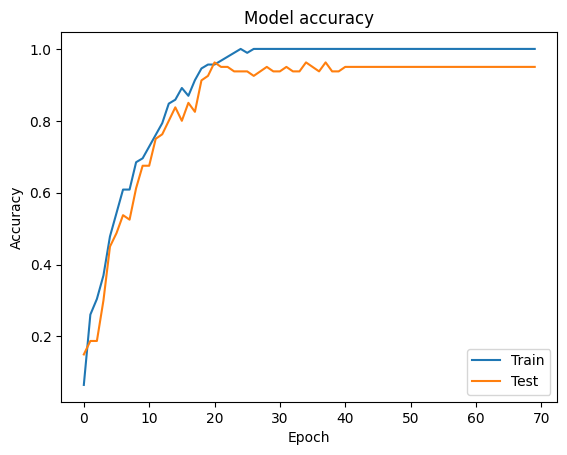

In [5]:
import matplotlib.pyplot as plt

plt.plot(model1.history["accuracy"])
plt.plot(model1.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="lower right")
plt.show()

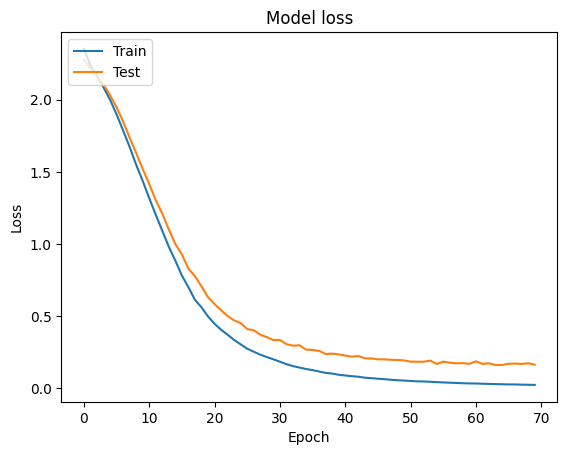

In [6]:
plt.plot(model1.history["loss"])
plt.plot(model1.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

3/3 [==============================] - 0s 2ms/step


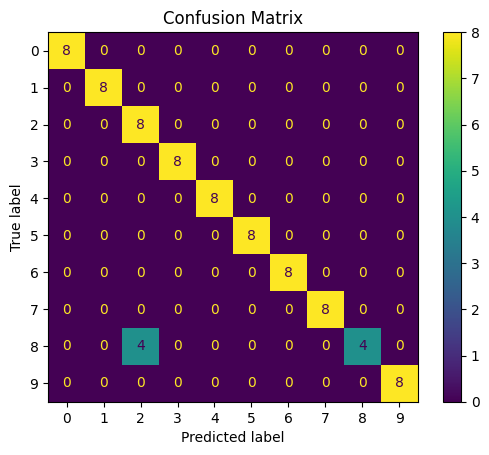

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicting on test data
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(X_test), axis=1)

# Creating confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

In [8]:
# Evaluating the model performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Manually entering input for prediction
manual_input = np.array(
    [
        [
            0,
            1,
            1,
            1,
            1,
            0,
            0,
            1,
            1,
            0,
            0,
            1,
            1,
            0,
            0,
            1,
            1,
            0,
            0,
            1,
            1,
            0,
            0,
            1,
            1,
            1,
            1,
            0,
        ]
    ]
)

prediction=model.predict(manual_input)
print(f"Prediction for the manual input: {prediction}")
predicted_class_index = np.argmax(prediction, axis=1)
predicted_class = (predicted_class_index[0] + 1) % 10
print(f"Predicted class for the manual input: {predicted_class}")

# Saving the model for future use
model.save("digit_recognition_model.h5")

3/3 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9500
Test Accuracy: 95.00%
1/1 [==============================] - 0s 51ms/step
Prediction for the manual input: [[6.9260182e-06 2.2451227e-04 3.8308410e-03 2.6918755e-05 3.6296623e-07
  4.3976761e-04 5.0786657e-05 2.2215227e-02 4.0014686e-05 9.7316462e-01]]
Predicted class for the manual input: 0


In [9]:
import tkinter as tk


root = tk.Tk()
root.title("4x7 Grid - Click to Toggle Cells")
root.geometry("400x650") 

ROWS = 7
COLS = 4

# Store the cell states (0 for white, 1 for black)
grid_data = [[0 for _ in range(COLS)] for _ in range(ROWS)]


# Function to toggle cell color and update grid data
def toggle_cell(row, col):
    grid_data[row][col] = 1 - grid_data[row][col]

    color = "black" if grid_data[row][col] == 1 else "white"
    cells[row][col].configure(bg=color)



def convert_to_vector():
    # Generate the initial vector from the grid
    vector = [grid_data[row][col] for row in range(ROWS) for col in range(COLS)]

    # Get the integer input for appending the 10-length vector
    try:
        num = int(input_entry.get())
        if 0 <= num <= 9:
            # Generate a vector of length 10 based on the input
            if num == 0:
                additional_vector = [0] * 9 + [1]  # 1 at the end for 0 input
            else:
                additional_vector = [1 if i == num - 1 else 0 for i in range(10)]
            # Append this vector to the original grid vector
            vector.extend(additional_vector)
        else:
            raise ValueError 
    except ValueError:
        input_entry.delete(0, tk.END)
        input_entry.insert(0, "Enter a number 0-9")
        return

    vector_str = ",".join(map(str, vector))


    vector_entry.delete(0, tk.END)
    vector_entry.insert(0, vector_str)



cells = []
for row in range(ROWS):
    row_cells = []
    for col in range(COLS):
        cell = tk.Button(
            root,
            width=8,  
            height=4,
            bg="white",
            command=lambda r=row, c=col: toggle_cell(r, c),
        )
        cell.grid(row=row, column=col, padx=0, pady=0)
        row_cells.append(cell)
    cells.append(row_cells)


input_label = tk.Label(root, text="Enter a number (0-9):")
input_label.grid(row=ROWS, column=0, columnspan=2)
input_entry = tk.Entry(root, width=5, justify="center")
input_entry.grid(row=ROWS, column=2, columnspan=2)


convert_button = tk.Button(root, text="Convert", command=convert_to_vector)
convert_button.grid(row=ROWS + 1, column=0, columnspan=COLS, pady=10)


vector_entry = tk.Entry(root, width=60, justify="center")
vector_entry.grid(row=ROWS + 2, column=0, columnspan=COLS, pady=10)

root.mainloop()

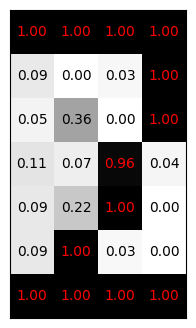

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Given data as a 1D list
data = [
    1.0,
    1.0,
    1.0,
    1.0,
    0.08912398515431424,
    0.0,
    0.03373762410541534,
    1.0,
    0.047547973372022635,
    0.3560084538268795,
    0.0,
    1.0,
    0.10596303699201742,
    0.06783649487826174,
    0.9610427533236404,
    0.04183190860513563,
    0.09295012219409088,
    0.2185704154662997,
    1.0,
    0.0,
    0.09203586087542849,
    1.0,
    0.029159323308953725,
    0.0,
    1.0,
    1.0,
    1.0,
    1.0,
]

# Reshape data into a 4x7 array (4 columns, 7 rows)
grid_data = np.array(data).reshape(7, 4)


plt.figure(figsize=(7, 4))
plt.imshow(
    grid_data, cmap="gray_r", vmin=0, vmax=1
)

plt.xticks([])
plt.yticks([])


for i in range(7):
    for j in range(4):
        plt.text(
            j,
            i,
            f"{grid_data[i, j]:.2f}",
            ha="center",
            va="center",
            color="black" if grid_data[i, j] < 0.5 else "red",
        )

plt.show()